In [3]:
import numpy as np
from tasks import *
from reservoir_net import *
import torch
from torch import nn,mm
import matplotlib.pyplot as plt

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
#device = 'cpu'
trans = lambda x: x.transpose(-1,-2)
my_conv = lambda a: torch.tensor(a,device=device,dtype=torch.float32).permute(1,2,0)[None,:,:,:]

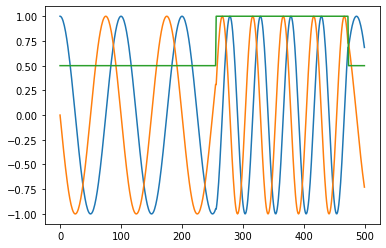

In [12]:
class experiment:
    def __init__(self,phases,task_paramsnet_params,,batches=1,device=device):
        local_vars=locals().copy()
        [setattr(self,item,local_vars[item]) for item in local_vars.keys() if not item=='self']
        self.task = sine_wave_task(**task_params)
        self.net = reservoir_net(**net_params)
        self.x0 = torch.normal(0,1,(batches,net.N,1),device=device)

    def plot(self):
        inputs,targets = task.generate_many(500,2,phases=phases)

In [ ]:
task_params={
    'inp_range':np.arange(0.5,1.5,0.1),
    'out_split_style':'phase',
    'split':2,
    'freq_func': lambda omega:omega/5,
    'fix':0
}
net_params = {
    "input_size" : 1,
    "N":256,
    'g':0.9,
    'dt':0.1,
    'rank':2,
    'device':device
}
np.arange(0,90,15)*np.pi/180